In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
from sklearn import svm
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
def extend(a, b, r):
    x = a - b
    m = (a + b) / 2
    return m-r*x/2, m+r*x/2

In [3]:
if __name__ == "__main__":
    np.random.seed(0)
    N = 20
    x = np.empty((4*N, 2))
    means = [(-1, 1), (1, 1), (1, -1), (-1, -1)]
    sigmas = [np.eye(2), 2*np.eye(2), np.diag((1,2)), np.array(((2,1),(1,2)))]
    for i in range(4):
        mn = stats.multivariate_normal(means[i], sigmas[i]*0.3)
        x[i*N:(i+1)*N, :] = mn.rvs(N)
    a = np.array((0,1,2,3)).reshape((-1, 1))
    y = np.tile(a, N).flatten()
    clf = svm.SVC(C=1, kernel='rbf', gamma=1, decision_function_shape='ovo')
    # clf = svm.SVC(C=1, kernel='linear', decision_function_shape='ovr')
    clf.fit(x, y)
    y_hat = clf.predict(x)
    acc = accuracy_score(y, y_hat)
    np.set_printoptions(suppress=True)
    print u'预测正确的样本个数：%d，正确率：%.2f%%' % (round(acc*4*N), 100*acc)
    # decision_function
    print clf.decision_function(x)
    print y_hat

预测正确的样本个数：69，正确率：86.25%
[[ 0.00041835  1.0003916   1.25158694  1.03912429  1.06272462  0.06194409]
 [ 0.73619309  0.99992928  1.00035655  1.01254723  1.0001967  -0.0689392 ]
 [-0.15399317  0.73429473  0.85195011  1.02091686  0.54511927 -0.30394945]
 [ 1.00009974  1.13669234  1.42106961  0.90744317  0.60940832 -0.33678376]
 [ 1.25490693  1.00737616  1.28386426  0.53541648  0.3328939  -0.23111811]
 [ 1.13837756  0.9998946   1.09243513  0.68425394  0.62492466 -0.09376565]
 [ 1.14531542  1.12700656  1.4596147   0.86224637  0.6542139  -0.26387772]
 [ 1.27456468  1.08751578  1.4197428   0.75811727  0.57714971 -0.23383485]
 [ 0.38108911  1.07508655  1.37185691  1.02312927  0.8309466  -0.16605383]
 [ 1.23239766  1.08305017  0.72089554  0.61064721 -0.24941275 -0.81087327]
 [ 0.9999704   0.99997809  1.00016225  0.05183437 -0.03803559 -0.10515298]
 [ 1.00011152  1.09099303  0.99944411  0.83414486  0.10857475 -0.70070868]
 [-0.68417088  0.16098897  0.36409711  0.85982419  0.55342992 -0.12958574]
 

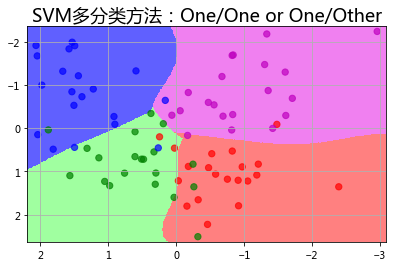

In [4]:
    x1_min, x2_min = np.min(x, axis=0)
    x1_max, x2_max = np.max(x, axis=0)
    x1_min, x1_max = extend(x1_min, x1_max, 1.05)
    x2_min, x2_max = extend(x2_min, x2_max, 1.05)
    x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]
    x_test = np.stack((x1.flat, x2.flat), axis=1)
    y_test = clf.predict(x_test)
    y_test = y_test.reshape(x1.shape)
    cm_light = mpl.colors.ListedColormap(['#FF8080', '#A0FFA0', '#6060FF', '#F080F0'])
    cm_dark = mpl.colors.ListedColormap(['r', 'g', 'b', 'm'])
    # mpl.rcParams['font.sans-serif'] = [u'SimHei']
    # mpl.rcParams['axes.unicode_minus'] = False
    plt.figure(facecolor='w')
    plt.pcolormesh(x1, x2, y_test, cmap=cm_light)
    plt.scatter(x[:, 0], x[:, 1], s=40, c=y, cmap=cm_dark, alpha=0.7)
    plt.xlim((x1_min, x1_max))
    plt.ylim((x2_min, x2_max))
    plt.grid(b=True)
    plt.tight_layout(pad=2.5)
    plt.title(u'SVM多分类方法：One/One or One/Other', fontsize=18)
    plt.show()